In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification

In [2]:
X, y = make_classification(n_samples=50000, n_features=15, n_informative=10, n_redundant=5,
                           n_classes=2, weights=[0.7], class_sep=0.7, random_state=15)

In [3]:
X.shape, y.shape

((50000, 15), (50000,))

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)

In [6]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((37500, 15), (37500,), (12500, 15), (12500,))

In [7]:
from sklearn import linear_model

In [8]:
# alpha : float
# Constant that multiplies the regularization term. 

# eta0 : double
# The initial learning rate for the ‘constant’, ‘invscaling’ or ‘adaptive’ schedules.

clf = linear_model.SGDClassifier(eta0=0.0001, alpha=0.0001, loss='log', random_state=15, penalty='l2', tol=1e-3, verbose=2, learning_rate='constant')
clf

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0001, fit_intercept=True,
       l1_ratio=0.15, learning_rate='constant', loss='log', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=15, shuffle=True, tol=0.001,
       validation_fraction=0.1, verbose=2, warm_start=False)

In [9]:
clf.fit(X=X_train, y=y_train)

-- Epoch 1
Norm: 0.76, NNZs: 15, Bias: -0.314605, T: 37500, Avg. loss: 0.455801
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 0.92, NNZs: 15, Bias: -0.469578, T: 75000, Avg. loss: 0.394737
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 0.98, NNZs: 15, Bias: -0.580452, T: 112500, Avg. loss: 0.385561
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 1.02, NNZs: 15, Bias: -0.660824, T: 150000, Avg. loss: 0.382161
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 1.04, NNZs: 15, Bias: -0.717218, T: 187500, Avg. loss: 0.380474
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 1.06, NNZs: 15, Bias: -0.761816, T: 225000, Avg. loss: 0.379481
Total training time: 0.03 seconds.
-- Epoch 7
Norm: 1.06, NNZs: 15, Bias: -0.793932, T: 262500, Avg. loss: 0.379096
Total training time: 0.04 seconds.
-- Epoch 8
Norm: 1.07, NNZs: 15, Bias: -0.820446, T: 300000, Avg. loss: 0.378826
Total training time: 0.05 seconds.
-- Epoch 9
Norm: 1.07, NNZs: 15, Bias: -0.840093, T: 337500, Avg. loss: 0.

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0001, fit_intercept=True,
       l1_ratio=0.15, learning_rate='constant', loss='log', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=15, shuffle=True, tol=0.001,
       validation_fraction=0.1, verbose=2, warm_start=False)

In [10]:
clf.coef_, clf.coef_.shape, clf.intercept_

(array([[-0.42328902,  0.18380407, -0.14437354,  0.34064016, -0.21316099,
          0.56702655, -0.44910569, -0.09094413,  0.21219292,  0.17750247,
          0.19931732, -0.00506998, -0.07781235,  0.33343476,  0.0320374 ]]),
 (1, 15),
 array([-0.85032916]))

## Implement Logistc Regression with L2 regularization Using SGD: without using sklearn

### Instructions

- Load the datasets(train and test) into the respective arrays

- Initialize the weight_vector and intercept term randomly

- Calculate the initlal log loss for the train and test data with the current weight and intercept and store it in a list

- for each epoch:
    - for each batch of data points in train: (keep batch size=1)
        - calculate the gradient of loss function w.r.t each weight in weight vector
        - Calculate the gradient of the intercept <a href='https://drive.google.com/file/d/1nQ08-XY4zvOLzRX-lGf8EYB5arb7-m1H/view?usp=sharing'>check this</a>
        - Update weights and intercept (check the equation number 32 in the above mentioned <a href='https://drive.google.com/file/d/1nQ08-XY4zvOLzRX-lGf8EYB5arb7-m1H/view?usp=sharing'>pdf</a>): <br>
        $w^{(t+1)} ← (1 − \frac{αλ}{N} )w^{(t)} + αx_n(y_n − σ((w^{(t)})^{T} x_n+b^{t}))$ <br>
        $b^{(t+1)} ← (b^t +  α(y_n - σ((w^{(t)})^{T} x_n+b^{t}))$ 
        - calculate the log loss for train and test with the updated weights (you can check the python assignment 10th question)
        - And if you wish, you can compare the previous loss and the current loss, if it is not updating, then
        you can stop the training
        - append this loss in the list ( this will be used to see how loss is changing for each epoch after the training is over )


- Plot the train and test loss i.e on x-axis the epoch number, and on y-axis the loss

- <strong>GOAL</strong>: compare your implementation and SGDClassifier's the weights and intercept, make sure they are as close as possible i.e difference should be in terms of 10^-3

In [11]:
X, Y = X_train.T, y_train.reshape(1, y_train.shape[0])
epochs = 38000
learningrate = 0.001
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
loss_train = []
m = X.shape[1]
w = np.random.randn(X.shape[0], 1)*0.01
b = 0
for epoch in range(epochs):
    z = np.dot(w.T, X) + b
    p = sigmoid(z)
    cost = -np.sum(np.multiply(np.log(p), Y) + np.multiply((1 - Y), np.log(1 - p)))/m
    loss_train.append(np.squeeze(cost))
    dz = p-Y
    dw = (1 / m) * np.dot(X, dz.T)
    db = (1 / m) * np.sum(dz)
    w = w - learningrate * dw 
    b = b - learningrate * db
# just add the regularization term to it
w = w + 0.0001*np.dot(w.T, w) #adding l2 regularization
b = b + 0.0001*np.dot(w.T, w) #adding L2 regularization
print("Weight = "+str(w))
print("b = "+str(b))

Weight = [[-0.42357643]
 [ 0.19305268]
 [-0.12657361]
 [ 0.35074561]
 [-0.2155691 ]
 [ 0.5710595 ]
 [-0.44604254]
 [-0.08467607]
 [ 0.20476775]
 [ 0.18422465]
 [ 0.1841919 ]
 [ 0.008599  ]
 [-0.08191509]
 [ 0.32693009]
 [ 0.01532953]]
b = [[-0.85270539]]


In [12]:
X, Y = X_test.T, y_test.reshape(1, y_test.shape[0])
epochs = 38000
learningrate = 0.001
def sigmoid(z):
    return 1 / (1 + np.exp(-z))
loss_test = []
m = X.shape[1]
w = np.random.randn(X.shape[0], 1)*0.01
b = 0
for epoch in range(epochs):
    z = np.dot(w.T, X) + b
    p = sigmoid(z)
    cost = -np.sum(np.multiply(np.log(p), Y) + np.multiply((1 - Y), np.log(1 - p)))/m
    loss_test.append(np.squeeze(cost))
    dz = p-Y
    dw = (1 / m) * np.dot(X, dz.T)
    db = (1 / m) * np.sum(dz)
    w = w - learningrate * dw 
    b = b - learningrate * db
# just add the regularization term to it
w_t = w + 0.0001*np.dot(w.T, w) #adding l2 regularization
b_t = b + 0.0001*np.dot(w.T, w) #adding L2 regularization
print("Weight = "+str(w))
print("b = "+str(b))

Weight = [[-0.42418502]
 [ 0.17502593]
 [-0.14147497]
 [ 0.34226867]
 [-0.19120281]
 [ 0.54818518]
 [-0.44581795]
 [-0.07372542]
 [ 0.21854102]
 [ 0.17619724]
 [ 0.19379924]
 [-0.0056037 ]
 [-0.07328596]
 [ 0.31936744]
 [ 0.02340944]]
b = -0.8600385876775191


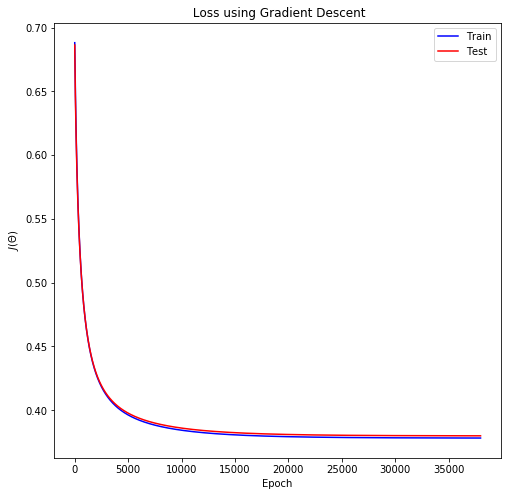

In [16]:
plt.figure(figsize=(8,8))
plt.plot(loss_train, "-b", label="Train")
plt.plot(loss_test, "-r", label="Test")
plt.xlabel("Epoch")
plt.ylabel("$J(\Theta)$")
plt.legend()
plt.title(" Loss using Gradient Descent")
plt.show()

### Goal

In [14]:
w.T-clf.coef_

array([[-0.00089601, -0.00877814,  0.00289857,  0.00162851,  0.02195817,
        -0.01884137,  0.00328774,  0.0172187 ,  0.0063481 , -0.00130523,
        -0.00551808, -0.00053372,  0.00452639, -0.01406732, -0.00862796]])

In [15]:
b-clf.intercept_

array([-0.00970943])